# Tasks
先做一遍end-to-end 分析，了解資料內容，再做成reusable pipeline

Unzip the file located at `/content/drive/MyDrive/關聯分析文本資料.zip`.


In [1]:
# !unzip -o "/content/drive/MyDrive/關聯分析文本資料.zip" # Colab code
# import zipfile

# zip_path = r"C:/Users/user/OneDrive - National University of Singapore/Desktop/金融文本資料分析/關聯分析文本資料.zip"
# extract_path = r"C:/Users/user/OneDrive - National University of Singapore/Desktop/金融文本資料分析"

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print("解壓完成：", extract_path)


List extracted files


In [2]:
import os

print("經濟金融:", os.listdir("經濟金融"))
print("數學:", os.listdir("數學"))


經濟金融: ['1000073.txt', '1000074.txt', '1000250.txt', '1000289.txt', '100066.txt', '1000709.txt', '1000790.txt', '1001106.txt', '1001668.txt', '1001847.txt', '1002200.txt', '1002369.txt', '1002938.txt', '100373.txt', '1004190.txt', '1004667.txt', '1004885.txt', '1005160.txt', '1005284.txt', '1005307.txt', '1005657.txt', '1005760.txt', '1006230.txt', '1006536.txt', '1006988.txt', '1007650.txt', '1007678.txt', '1009634.txt', '1009792.txt', '1009823.txt', '1010019.txt', '1010043.txt', '1010064.txt', '1010065.txt', '1010071.txt', '1010156.txt', '1010200.txt', '1010247.txt', '1010648.txt', '1011157.txt', '1011192.txt', '1011205.txt', '1011225.txt', '1011429.txt', '1011451.txt', '1011470.txt', '1011473.txt', '1011668.txt', '1011722.txt', '1011781.txt', '1011784.txt', '1011838.txt', '1011839.txt', '1011933.txt', '1011944.txt', '1011945.txt', '1011967.txt', '1011968.txt', '1012083.txt', '1012084.txt', '1012107.txt', '1012109.txt', '1012130.txt', '1012175.txt', '1012256.txt', '1012298.txt', '1012

In [3]:
econ_count = len(os.listdir("經濟金融"))
math_count = len(os.listdir("數學"))

print("files in 經濟金融:", econ_count)
print("files in 數學:", math_count)


files in 經濟金融: 7420
files in 數學: 2523


Display the content of one of the extracted text files.


In [4]:
file_path = '經濟金融/274366.txt'

try:
  with open(file_path, 'r', encoding='utf-8') as f:
    content = f.read()
    print(content)
except FileNotFoundError:
  print(f"File not found: {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

中的列法
應付賬款 為會計原理之一 一般來說是指賒購貨品或先享用勞務等所發生的債務 且此債務並未以其他書面承諾 如應付票據所承諾保證其支付
在簿記記載中 應付帳款初始發生時 通常為貸方



In [5]:
file_path = '經濟金融/1000073.txt'

try:
  with open(file_path, 'r', encoding='utf-8') as f:
    content = f.read()
    print(content)
except FileNotFoundError:
  print(f"File not found: {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

border 1 cellpadding 4 cellspacing 0 align right width 280 style margin 0 0 1em 1em background ffffff border 1px aaaaaa solid border collapse collapse font size 90
洋浦經濟開發區 新英灣區
辦事處駐地 新英灣社區
總面積
平方公裡
總人口
萬
方言 海南話 儋州話
中國行政區 行政區類別 街道 行政區劃 街道
電話區號
0898
郵遞區號 578101
車牌代號 瓊C
新英灣區 位於中國海南省的洋浦經濟開發區 2009年3月 由原幹沖區 新英灣區和新都區 洋浦經濟開發區 新都區三區合并為新淦沖區
行政概況
新英灣區轄下分別有5個社區 新英灣社區 白沙社區 鹹塘社區 五山社區 共嗚社區
學校
洋浦第一小學



In [6]:
file_path = '數學/956721.txt'

try:
  with open(file_path, 'r', encoding='utf-8') as f:
    content = f.read()
    print(content)
except FileNotFoundError:
  print(f"File not found: {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

皮埃爾·勒內·德利涅子爵 生於布魯塞爾 比利時數學家 他最重要的貢獻之一是20世紀70年代關於韋伊猜想的工作
德利涅早年就讀於布魯塞爾自由大學 1968年在格羅滕迪克指導下完成博士論文 1970年26歲的德利涅成為法國高等科學研究所教授 他在那裡完成了關於霍奇理論和韋伊猜想的工作 德利涅1984年移居美國 進入普林斯頓高等研究院
德利涅1978年獲得菲爾茲獎 1988年獲得克拉福德獎 2008年獲得沃爾夫獎 2013年獲得阿貝爾獎
2006年比利時國王封德利涅為子爵



# Tokenization

In [7]:
! pip install scikit-learn
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the directories containing the text files
directories = ['經濟金融', '數學']
all_text = []

# Read all text files from the directories
for directory in directories:
  for filename in os.listdir(directory):
    if filename.endswith(".txt"):
      file_path = os.path.join(directory, filename)
      try:
        with open(file_path, 'r', encoding='utf-8') as f:
          content = f.read()
          all_text.append(content)
      except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# Apply TF-IDF vectorization
initial_tfidf_vectorizer = TfidfVectorizer()
initial_tfidf_matrix = initial_tfidf_vectorizer.fit_transform(all_text)

print("TF-IDF matrix shape:", initial_tfidf_matrix.shape)
print("TF-IDF features:", initial_tfidf_vectorizer.get_feature_names_out()[:20]) # Print first 20 features

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


TF-IDF matrix shape: (9943, 726031)
TF-IDF features: ['00' '000' '0000' '00000' '000000' '0000000' '000000000000000000000000'
 '000000000000000000000000000000000001' '000000000000000000000000000001'
 '000000000000000000000000001' '000000000000000000000001'
 '000000000000000000001' '000000000000000001' '000000000000001'
 '000000000000045422' '000000000000248' '000000000001' '000000001'
 '0000000033' '0000000121258885']


Dimension Explosion, prepocess the data

In [8]:
! pip install opencc-python-reimplemented

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Utilize existing Chinese stopwords dict
resource: https://github.com/goto456/stopwords/blob/master/cn_stopwords.txt
### Chinese & English stopwords dict
resource: https://github.com/endNone/stopwords/blob/main/stopwords.txt

In [9]:
import opencc

# 簡轉繁轉換器
converter = opencc.OpenCC('s2t')

stopwords_file_path = 'C:/Users/user/OneDrive - National University of Singapore/Desktop/金融文本資料分析/cn_stopwords.txt'
# 讀取停用詞表
with open(stopwords_file_path, "r", encoding='utf-8') as f:
  stopwords = [line.strip() for line in f]

# 轉成繁體
stopwords_traditional = [converter.convert(w) for w in stopwords]
print(stopwords_traditional)


['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一切', '一則', '一方面', '一旦', '一來', '一樣', '一般', '一轉眼', '萬一', '上', '上下', '下', '不', '不僅', '不但', '不光', '不單', '不只', '不外乎', '不如', '不妨', '不盡', '不盡然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不獨', '不管', '不至於', '不若', '不論', '不過', '不問', '與', '與其', '與其說', '與否', '與此同時', '且', '且不說', '且說', '兩者', '個', '個別', '臨', '爲', '爲了', '爲什麼', '爲何', '爲止', '爲此', '爲着', '乃', '乃至', '乃至於', '麼', '之', '之一', '之所以', '之類', '烏乎', '乎', '乘', '也', '也好', '也罷', '了', '二來', '於', '於是', '於是乎', '云云', '云爾', '些', '亦', '人', '人們', '人家', '什麼', '什麼樣', '今', '介於', '仍', '仍舊', '從', '從此', '從而', '他', '他人', '他們', '以', '以上', '以爲', '以便', '以免', '以及', '以故', '以期', '以來', '以至', '以至於', '以致', '們', '任', '任何', '任憑', '似的', '但', '但凡', '但是', '何', '何以', '何況', '何處', '何時', '餘外', '作爲', '你', '你們', '使', '使得', '例如', '依', '依據', '依照', '便於', '俺', '俺們', '倘', '倘使', '倘或', '倘然', '倘若', '借', '假使', '假如', '假若', '儻然', '像', '兒', '先不先', '光是', '全體', '全部', '

In [10]:
cnen_stopwords_path = 'C:/Users/user/OneDrive - National University of Singapore/Desktop/金融文本資料分析/cnen_stopwords.txt'
# 讀取中英文停用詞表
with open(cnen_stopwords_path, "r", encoding='utf-8') as f:
  cnen_stopwords = [line.strip() for line in f]

# 轉成繁體
cnen_stopwords_traditional = [converter.convert(w) for w in cnen_stopwords]
print(cnen_stopwords_traditional) 

['', '"', '#', '$', '&', "'", "'d", "'ll", "'m", "'re", "'s", "'t", "'tis", "'twas", "'ve", '(', ')', '*', '+', ',', '-', '--', '.', '...', '......', '...................', './', '.一', '.數', '.日', '/', '//', '0', '1', '10', '2', '3', '39', '4', '5', '6', '7', '8', '9', ':', '://', '::', ';', '<', '=', '>', '?', '@', 'Lex', 'ZT', 'ZZ', '[', ']', '_', 'a', "a's", 'able', 'ableabout', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'adopted', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ago', 'ah', 'ahead', 'ai', "ain't", 'aint', 'al', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'apart', 'apparen

Introduce existing financial terms dict:
1. To avoid meaningful terms got separated when using jieba
2. To keep the keywords especially when it's less frequent

resource: https://github.com/sijichun/CNEconDict/blob/master/Econ_Dict.txt

先用jieba.load_userdict讓後面斷詞時不會把有意義的停用詞斷掉，再把停用詞去掉

In [11]:
! pip install jieba
import jieba
financial_terms_file_path = 'C:/Users/user/OneDrive - National University of Singapore/Desktop/金融文本資料分析/Econ_Dict.txt'
with open(financial_terms_file_path, 'r', encoding='utf-8') as f:
  financial_terms = [line.strip() for line in f]

financial_terms_traditional = [converter.convert(w) for w in financial_terms]

jieba.load_userdict(financial_terms_traditional)


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.359 seconds.
Prefix dict has been built successfully.


Filtering stopwords & noise (by introducing existing stopwords dict)

In [12]:
import re
stopwords = set(stopwords_traditional)
cnen_stopwords_traditional = set(cnen_stopwords_traditional)
def is_noise(token):
  # 純數字或數字+單位
  if re.match(r'^\d+[a-zA-Z]*$', token):
    return True
  # 顏色代碼 (六位十六進制)
  if re.match(r'^[0-9a-fA-F]{6}$', token):
    return True
  # CSS/HTML 單位 (px, em, mm, km, cm)
  if re.match(r'^\d+(px|em|mm|km|cm|i)$', token):
    return True
  # 字母+數字混合，長度大於5
  if re.match(r'^[a-zA-Z0-9]{5,}$', token):
    return True
  return False

def tokenize_and_clean(text):
  tokens = jieba.lcut(text)
  clean_tokens = []
  for t in tokens:
    # 去掉純數字
    if re.match(r'^\d+$', t):
      continue
    # 去掉過長的 token
    if len(t) > 20:
      continue
    # 去掉停用詞
    if t in stopwords:
      continue
    if t in cnen_stopwords_traditional:
      continue
    if is_noise(t):
      continue
    clean_tokens.append(t)
  return " ".join(clean_tokens)

processed_docs = [tokenize_and_clean(text) for text in all_text]

# TF-IDF詞向量
cleaned_vectorizer = TfidfVectorizer(min_df=2) # keep those appear at least 2 docs
cleaned_tfidf_matrix = cleaned_vectorizer.fit_transform(processed_docs)

print("TF-IDF matrix shape:", cleaned_tfidf_matrix.shape)
print("TF-IDF features:", cleaned_vectorizer.get_feature_names_out()[:20])

TF-IDF matrix shape: (9943, 87930)
TF-IDF features: ['1x1' '2013年諾貝爾經濟學獎' '21世紀海上絲綢之路' '3a2' '3a3' '3b2' '3c產品' '3e2' '3x2'
 '4s店' '60x6' '77國集團' '863計劃' '8x8' '985工程' '__' '_____' 'a0' 'a01' 'a07']


### ^ Successfully reduce from 726K to 88 K, good enough to proceed

# Word/Doc Similarity

## 詞與文本/主題相似度矩陣

詞相似度分析: 只採50文本以上500文本以下的詞，因為cleaned_tfidf的cosine_similarity爆RAM

並且根據此tfidf利用NMF模型拆分主題，檢驗該區段內各主題字詞是否具代表性與獨立性

In [13]:
from sklearn.decomposition import NMF

adjusted_vectorizer = TfidfVectorizer(min_df=50, max_df=500)
adjusted_tfidf_matrix = adjusted_vectorizer.fit_transform(processed_docs)
print("Adjusted TF-IDF matrix shape:", adjusted_tfidf_matrix.shape)

adjusted_vocab = adjusted_vectorizer.get_feature_names_out()
print("Adjusted TF-IDF features:", adjusted_vocab)
print(f"Vocabulary size: {len(adjusted_vocab)}")

# NMF 主題模型
# 可從權重得知該文本是什麼主題
nmf = NMF(n_components = 15, random_state=42, init="nndsvda")
doc_topic_matrix = nmf.fit_transform(adjusted_tfidf_matrix) 
topic_term_matrix = nmf.components_
print("Document-Topic Matrix shape:", doc_topic_matrix.shape) 
print("Document-Topic Matrix:", doc_topic_matrix) 
print("Topic-Term Matrix shape:", topic_term_matrix.shape)
print("Topic-Term Matrix:", topic_term_matrix)

Adjusted TF-IDF matrix shape: (9943, 3733)
Adjusted TF-IDF features: ['aaa' 'ab' 'ac' ... '黨籍' '鼓勵' '龐大']
Vocabulary size: 3733
Document-Topic Matrix shape: (9943, 15)
Document-Topic Matrix: [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.17292857e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.29989873e-03]
 [7.05494194e-04 0.00000000e+00 1.02571016e-03 ... 0.00000000e+00
  6.33194421e-03 0.00000000e+00]
 ...
 [2.21694349e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.41289927e-03 5.53685038e-02 0.00000000e+00 ... 1.12618286e-02
  4.42887380e-05 0.00000000e+00]
 [7.90939253e-03 0.00000000e+00 0.00000000e+00 ... 8.21469395e-03
  0.00000000e+00 2.04283979e-03]]
Topic-Term Matrix shape: (15, 3733)
Topic-Term Matrix: [[0.         0.01153948 0.07223135 ... 0.         0.02083366 0.00303193]
 [0.         0.05785952 0.02740511 ... 0.         0.         0.        ]
 [0.0033

Word Similarity Matrix -- Tfidf L2 Normalization 後取詞相似矩陣 

In [14]:
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
word_vectors = adjusted_tfidf_matrix.T.toarray() # (n_words, n_docs)
word_vectors_normalized = normalize(word_vectors, norm='l2', axis=1)

# 詞相似度矩陣
word_sim_matrix = cosine_similarity(word_vectors_normalized)  # (n_words, n_words)

print("Word similarity matrix shape:", word_sim_matrix.shape)
print(f"Vocabulary size: {len(adjusted_vocab)}")
print(f"Match: {word_sim_matrix.shape[0] == len(adjusted_vocab)}")

Word similarity matrix shape: (3733, 3733)
Vocabulary size: 3733
Match: True


查看主題0的關鍵字權重

In [15]:
import pandas as pd
feature_names = adjusted_vectorizer.get_feature_names_out()
topic_df = pd.DataFrame(topic_term_matrix[0], index=feature_names, columns=["Weight"])
print(topic_df.sort_values("Weight", ascending=False).head(20))

          Weight
幾何      1.466683
巴黎      1.062436
代數      0.964650
高等      0.782661
論文      0.697608
約翰      0.691861
哲學      0.679041
猜想      0.668964
學會      0.664394
皇家      0.637699
科學院     0.616786
哈佛大學    0.585549
任教      0.578558
天文      0.578206
普林斯頓大學  0.536655
數論      0.498779
劍橋大學    0.480299
院士      0.472095
數學系     0.471895
學生      0.464845


查看各主題內的關鍵字代表 (權重top10)

In [16]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[:-no_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_indices]
        print(f"主題 {topic_idx}: {', '.join(top_words)}")

display_topics(nmf, adjusted_vectorizer.get_feature_names_out(), no_top_words=10)

主題 0: 幾何, 巴黎, 代數, 高等, 論文, 約翰, 哲學, 猜想, 學會, 皇家
主題 1: frac, pi, sqrt, sum, 公式, sin, cos, dx, cdot, 方程
主題 2: gdp, 人均, 購買力平價, 本幣, 比重, 總值, 位次, 人民幣, 全省, 推算
主題 3: 中國科學院, 院士, 當選為, 物理系, 北京大學, 所長, 部委, 學部, 清華大學, 曾任
主題 4: 證券, 控股, 股票, 收購, 業務, 資產, 上市, 億元, 旗下, 港元
主題 5: 公裡, 開發區, 街道, 平方, 經濟技術開發區, 鐵路, 區劃, 規劃, 天津, 億元
主題 6: 行政院, 委員, 國立, 經濟部, 董事長, 部長, 國民黨, 國民, 院長, 出任
主題 7: 本分, 模板, 歸納, 部位, 收錄, 總部, 分類, 總部設, 用戶, 商場
主題 8: of, dat, name, may, 斯特, der, gust, july, 猜想, au
主題 9: 勞動, 農業, 土地, 資本, 出口, 需求, 石油, 資本主義, 社會主義, 通貨
主題 10: 背面, 正面, 硬幣, 紙幣, 流通, 面值, url, 歐元, iso, 圖案
主題 11: nbsp, hans, hant, 擴充, 透過, 空間, font, 序列, cite, 區劃
主題 12: 集合, 空間, 元素, 整數, 符號, 定義, 實數, 子集, 序列, 演算法
主題 13: term, 大臣, 總統, 總理, 民主, 議員, 內閣, 選舉, 部長, 眾議院
主題 14: 模型, 變數, 隨機, 機率, 利率, 風險, 假設, 預測, 組合, 資產


## L2 Normalization 之後取相似矩陣

Doc/Topic Similarity Matrix -- L2 Normalization 後取doc/topic相似矩陣 

In [17]:
doc_topic_normalized = normalize(doc_topic_matrix, norm='l2', axis=1)
topic_term_normalized = normalize(topic_term_matrix, norm='l2', axis=1)

# 文本相似度矩陣基於主題分布
doc_sim_matrix = cosine_similarity(doc_topic_normalized)  # (n_docs, n_docs)

# 主題相似度矩陣
topic_sim_matrix = cosine_similarity(topic_term_normalized)  # (n_topics, n_topics)


print("Document similarity matrix shape:", doc_sim_matrix.shape)
print("Topic similarity matrix shape:", topic_sim_matrix.shape)

Document similarity matrix shape: (9943, 9943)
Topic similarity matrix shape: (15, 15)


Visualize 主題相似度

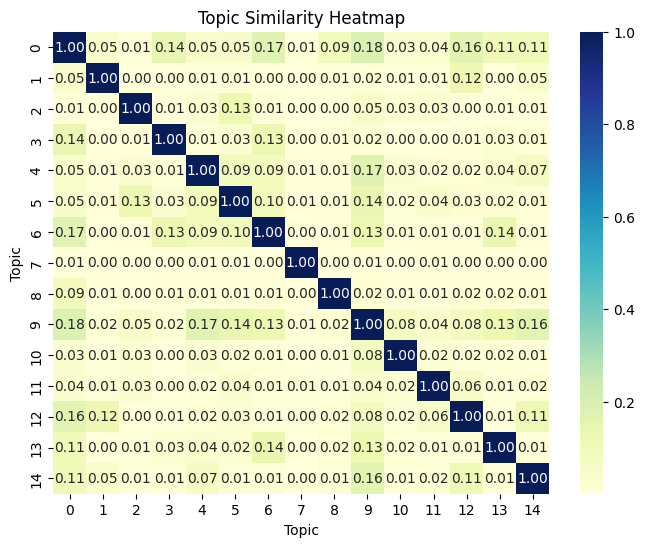

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(topic_sim_matrix, cmap="YlGnBu", annot=True, fmt=".2f")

plt.title("Topic Similarity Heatmap")
plt.xlabel("Topic")
plt.ylabel("Topic")
plt.show()

### ^ 基本上沒什麼關聯，可初步推論主題分散

建立doc list以及可用詞彙以用作後續pipeline

In [19]:
doc_list = []
doc_list.extend(os.listdir("經濟金融"))
doc_list.extend(os.listdir("數學"))
print(doc_list)
print("Total documents:", len(doc_list))
print("可用詞彙數量:", len(adjusted_vocab))
print("\n前 20 個詞:")
for i, word in enumerate(adjusted_vocab[:20]):
    print(f"{i+1}. {word}")

print("\n後 20 個詞:")
for i, word in enumerate(adjusted_vocab[-20:], len(adjusted_vocab)-19):
    print(f"{i}. {word}")

['1000073.txt', '1000074.txt', '1000250.txt', '1000289.txt', '100066.txt', '1000709.txt', '1000790.txt', '1001106.txt', '1001668.txt', '1001847.txt', '1002200.txt', '1002369.txt', '1002938.txt', '100373.txt', '1004190.txt', '1004667.txt', '1004885.txt', '1005160.txt', '1005284.txt', '1005307.txt', '1005657.txt', '1005760.txt', '1006230.txt', '1006536.txt', '1006988.txt', '1007650.txt', '1007678.txt', '1009634.txt', '1009792.txt', '1009823.txt', '1010019.txt', '1010043.txt', '1010064.txt', '1010065.txt', '1010071.txt', '1010156.txt', '1010200.txt', '1010247.txt', '1010648.txt', '1011157.txt', '1011192.txt', '1011205.txt', '1011225.txt', '1011429.txt', '1011451.txt', '1011470.txt', '1011473.txt', '1011668.txt', '1011722.txt', '1011781.txt', '1011784.txt', '1011838.txt', '1011839.txt', '1011933.txt', '1011944.txt', '1011945.txt', '1011967.txt', '1011968.txt', '1012083.txt', '1012084.txt', '1012107.txt', '1012109.txt', '1012130.txt', '1012175.txt', '1012256.txt', '1012298.txt', '1012464.tx

# 詞關聯pipeline

### Somes tools for the end reusable pipeline, follow the above steps

取相似詞

In [20]:
import numpy as np
def get_similar_words(keyword, words, sim_matrix, top_k=11,):
    if keyword not in words:
        return None
    
    idx = list(words).index(keyword)
    sims = sim_matrix[idx] # getting the similarities to all other words, a vector whose length=len(words)
    
    # Sort the similarities from high to low
    sorted_idx = np.argsort(sims)[::-1]
    # Exclude keyword itself 
    sorted_idx = sorted_idx[:top_k] # [i for i in sorted_idx if i != idx]
    # return (word, similarity)
    results = [(words[i], float(sims[i])) for i in sorted_idx]
    return results


相似度長條圖

In [21]:
def plot_similar_words(keyword, results):
    """相似詞長條圖"""
    if not results:
        print("沒有結果")
        return
    
    words = [w for w, _ in results]
    scores = [s for _, s in results]
    
    plt.figure(figsize=(10, 6))
    plt.barh(words, scores, color='steelblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Similarity Score')
    plt.title(f"Top Related Words for '{keyword}'")
    plt.tight_layout()
    plt.show()


相似度heatmap

In [38]:
def plot_word_similarity_heatmap(keyword, results, word_sim_matrix, vocab):
    """詞相似度熱力圖"""
    if not results:
        print("沒有結果")
        return
    
    # 相似詞清單
    selected_words = [w for w, _ in results]
    
    # 在完整詞彙表中找 index
    indices = [list(vocab).index(w) for w in selected_words]
    sub_sim_matrix = word_sim_matrix[np.ix_(indices, indices)]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(sub_sim_matrix, 
                xticklabels=selected_words, 
                yticklabels=selected_words, 
                cmap="coolwarm", annot=True, fmt='.2f', 
                cbar_kws={'label': 'Similarity'})
    plt.title(f"Word Similarity Heatmap: '{keyword}'")
    plt.tight_layout()
    plt.show()


詞 pipeline

In [39]:
def analyze_keyword(keyword, adjusted_vocab, word_sim_matrix):
    """
    完整的關鍵詞分析 Pipeline
    """
    print(f"分析關鍵詞: '{keyword}'")
    print(f"{'='*60}")
    
    # 相似詞
    similar_words = get_similar_words(keyword, adjusted_vocab, word_sim_matrix)
    
    if similar_words is None:
        print(f"'{keyword}' similar words not found in vocab.")
        return None
    
    print(f"\n{len(similar_words)} similar words found for '{keyword}'")
    for i, (word, sim) in enumerate(similar_words, 1):
        print(f" {i}. {word}: {sim:.4f}")
    
    # visualizations
    plot_similar_words(keyword, similar_words)
    plot_word_similarity_heatmap(keyword, similar_words, word_sim_matrix, adjusted_vocab)

    return similar_words

詞分析

分析關鍵詞: '黃金'

11 similar words found for '黃金'
 1. 黃金: 1.0000
 2. 布雷: 0.3023
 3. 白銀: 0.2282
 4. 貴金屬: 0.1839
 5. 森林: 0.1759
 6. 崩潰: 0.1461
 7. 體系: 0.1285
 8. 兌換: 0.1281
 9. 開採: 0.1192
 10. 承認: 0.1155
 11. 實行: 0.1012


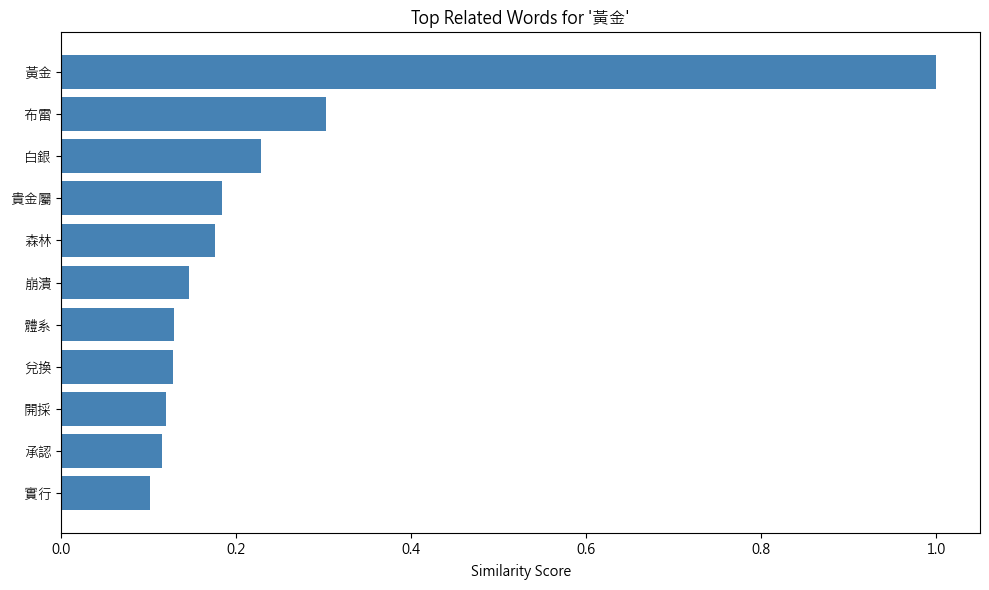

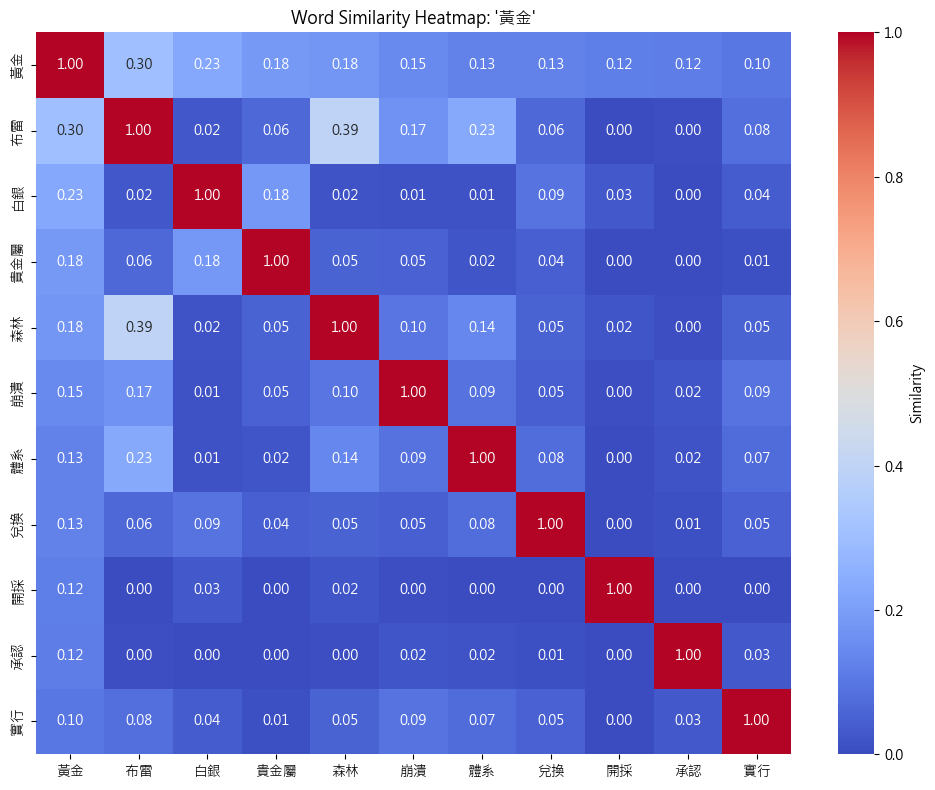

[('黃金', 1.0),
 ('布雷', 0.30227621069585153),
 ('白銀', 0.22816801530384126),
 ('貴金屬', 0.1838689310231435),
 ('森林', 0.17588904397314523),
 ('崩潰', 0.14614324574584794),
 ('體系', 0.12847283998183526),
 ('兌換', 0.12806816544907243),
 ('開採', 0.1192286294313937),
 ('承認', 0.11551054727789091),
 ('實行', 0.101188821324473)]

In [41]:
keyword = input("輸入關鍵詞: ").strip()
analyze_keyword(keyword, adjusted_vocab, word_sim_matrix)

# 文本關聯 -- 基於Adjusted_tfidf分析

Tools to be used

In [25]:
filename_to_index = {fname: idx for idx, fname in enumerate(doc_list)}
index_to_filename = {idx: fname for idx, fname in enumerate(doc_list)}

In [26]:
def get_similar_docs_from_tfidf(doc_name, doc_list, sim_matrix, top_k=10):
    if doc_name not in doc_list:
        return None
    
    idx = doc_list.index(doc_name)
    sims = sim_matrix[idx]

    # 排序，排除自己
    order = sims.argsort()[::-1][1:top_k+1]

    return [(doc_list[i], sims[i]) for i in order]


In [27]:
def extract_keywords_from_tfidf(doc_name, doc_list, tfidf_matrix, vocab, top_k=15):
    idx = doc_list.index(doc_name)
    vec = tfidf_matrix[idx].toarray().flatten()

    order = vec.argsort()[::-1][:top_k]
    return [(vocab[i], vec[i]) for i in order]


In [28]:
def plot_doc_similarity_2(doc_name, similar_docs):
    labels = [name for name, _ in similar_docs]
    scores = [score for _, score in similar_docs]

    plt.figure(figsize=(8,4))
    plt.bar(labels, scores)
    plt.title(f"Documents most similar to: {doc_name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [29]:
from sklearn.cluster import KMeans

def cluster_docs(doc_embeddings, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(doc_embeddings)
    return labels


In [30]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network_graph(doc_name, similar_docs):
    
    G = nx.Graph()
    G.add_node(doc_name, color='red')

    # 加入 Top 相關文件
    for name, score in similar_docs:
        G.add_node(name, color='blue')
        G.add_edge(doc_name, name, weight=score)

    pos = {doc_name: (0, 0)}
    radius = 5
    n = len(similar_docs)
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)

    for i, (name, _) in enumerate(similar_docs):
        x = radius * np.cos(angles[i])
        y = radius * np.sin(angles[i])
        pos[name] = (x, y)

    plt.figure(figsize=(10, 8))

    node_colors = [G.nodes[n]['color'] for n in G.nodes]

    # 邊的粗細（依 similarity score）
    edges = G.edges()
    weights = [G[u][v]['weight'] * 5 for u, v in edges]

    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        edge_color='gray',
        width=weights,
        node_size=800,
        font_size=10
    )

    edge_labels = {(doc_name, name): f"{score:.2f}" for name, score in similar_docs}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_color="green")

    plt.title(f"Network Graph for {doc_name}")
    plt.axis("off")
    plt.show()


In [31]:
! pip install umap-learn
import umap
import matplotlib.pyplot as plt

def plot_document_scatter(doc_embeddings, clusters, doc_names, targeted_doc=None, similar_docs=None):
    reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, random_state=42)
    emb_2d = reducer.fit_transform(doc_embeddings)

    # Colors for clusters
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        emb_2d[:, 0], emb_2d[:, 1], 
        c=clusters, 
        s=10,
        cmap='tab10', 
        alpha=0.2
    )

    # Highlight targeted document
    if targeted_doc:
        idx = doc_names.index(targeted_doc)
        plt.scatter(
            emb_2d[idx, 0], emb_2d[idx, 1], c='red', s=150, edgecolors='black', label=targeted_doc)
        
        plt.legend()

    if similar_docs:
        for i, name in enumerate(similar_docs):
            if name in doc_names:
                idx = doc_names.index(name)
                plt.scatter(emb_2d[idx, 0], emb_2d[idx, 1], c='green', s=50, edgecolors='lightgray', label="Similar Doc" if i==0 else "")

    plt.title("2D Embedding Scatter Plot")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.colorbar(scatter, label="Cluster ID")
    plt.show()


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Document embeddings shape: (9943, 15)

最相關文件 Top 10：
999393.txt: 0.999
1000074.txt: 0.998
769249.txt: 0.997
1619822.txt: 0.996
1562669.txt: 0.995
973062.txt: 0.993
1880832.txt: 0.993
925869.txt: 0.992
769513.txt: 0.991
3050740.txt: 0.991

此文件的關鍵詞：
社區: 0.764
開發區: 0.333
區號: 0.245
街道: 0.218
海南: 0.136
方言: 0.135
概況: 0.129
駐地: 0.126
郵遞: 0.123
小學: 0.120
總面積: 0.119
辦事處: 0.112
電話: 0.110
區劃: 0.110
合并: 0.110

預測此文件的 Cluster： 0


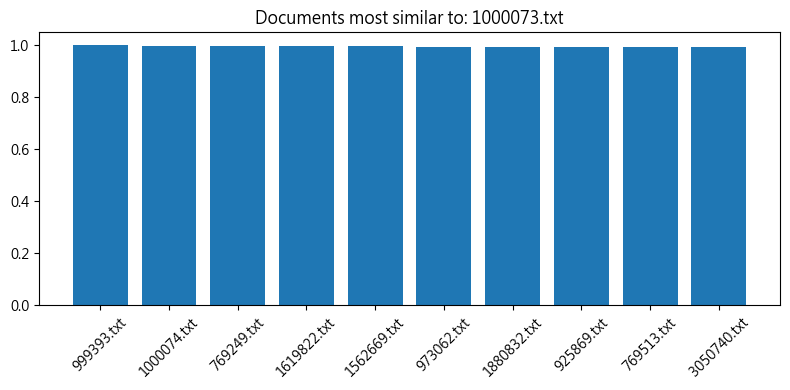

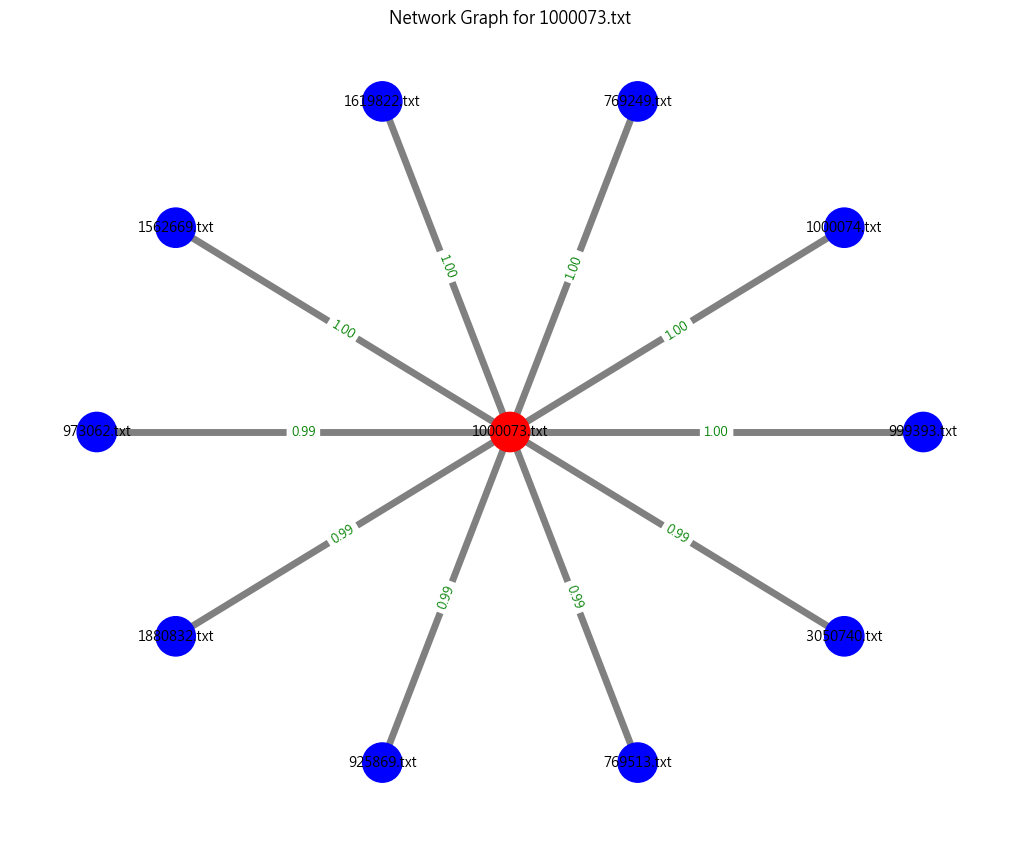

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


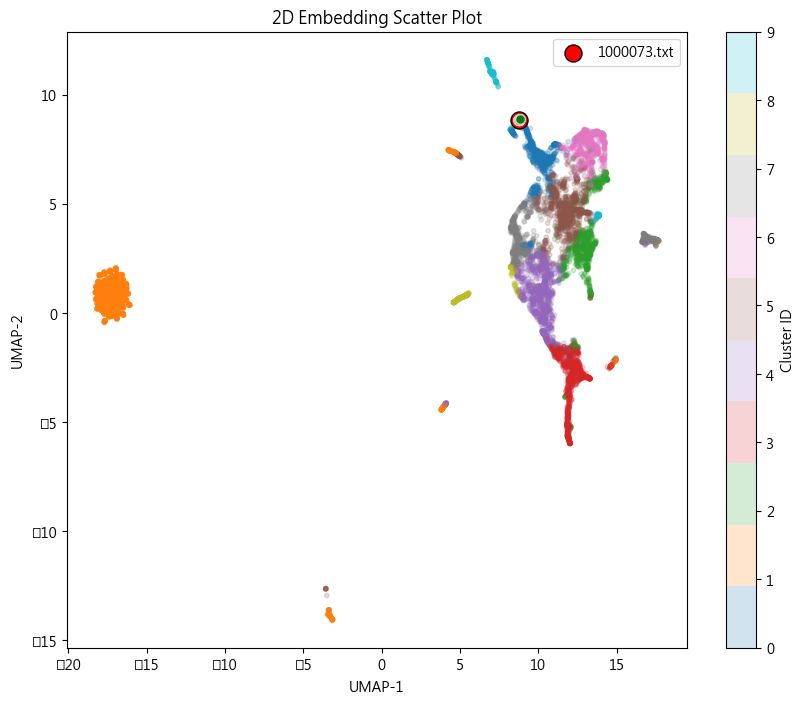

In [32]:
from sklearn.decomposition import TruncatedSVD

doc_name = input("請輸入要分析的檔名：").strip()

svd = TruncatedSVD(n_components=15, random_state=42)
doc_embeddings = svd.fit_transform(adjusted_tfidf_matrix)
print("Document embeddings shape:", doc_embeddings.shape) # Should be (9943, 500)
doc_embeddings = normalize(doc_embeddings, norm = 'l2', axis=1)
doc_sim_matrix_truncated = cosine_similarity(doc_embeddings)

similar_docs = get_similar_docs_from_tfidf(doc_name, doc_list, doc_sim_matrix_truncated)
keywords = extract_keywords_from_tfidf(doc_name, doc_list, adjusted_tfidf_matrix, adjusted_vectorizer.get_feature_names_out())
clusters = cluster_docs(doc_embeddings, n_clusters=10)

if similar_docs is None:
    print("找不到此檔名")
else:
    print("\n最相關文件 Top 10：")
    for name, score in similar_docs:
        print(f"{name}: {score:.3f}")

    print("\n此文件的關鍵詞：")
    for w, s in keywords:
        print(f"{w}: {s:.3f}")

    print("\n預測此文件的 Cluster：", clusters[doc_list.index(doc_name)])

    # Visualization
    plot_doc_similarity_2(doc_name, similar_docs)

    plot_network_graph(doc_name, similar_docs)
    # plot_global_scatter(doc_embeddings, doc_index=doc_name, top_k=10)
    plot_document_scatter(doc_embeddings, clusters, doc_list, targeted_doc=doc_name, similar_docs=[name for name, _ in similar_docs])
    # plot_global_network_graph(doc_name, doc_sim_matrix, top_k=10)


# 文本分析 -- 基於NMF主題模型分析

In [33]:
def get_similar_docs_nmf(doc_name, doc_list, doc_sim_matrix, top_k=10):
    if doc_name not in doc_list:
        print(f"'{doc_name}' not found in doc_list")
        return None
    
    idx = doc_list.index(doc_name)
    sims = doc_sim_matrix[idx]

    # 排序，排除自己
    order = np.argsort(sims)[::-1][1:top_k+1]

    return [(doc_list[i], sims[i]) for i in order]

In [34]:
def extract_keywords_nmf(doc_index, doc_list, doc_topic_matrix, words, top_k=15):
    if isinstance(doc_index, str):
        if doc_index not in doc_list:
            return None
        doc_index = doc_list.index(doc_index)
    
    doc_topics = doc_topic_matrix[doc_index]
    keywords = []
    for topic_idx, topic_weight in enumerate(doc_topics):
        if topic_weight > 0:
            topic_terms = nmf.components_[topic_idx]
            top_term_indices = topic_terms.argsort()[::-1][:3]
            for term_idx in top_term_indices:
                keywords.append((words[term_idx], float(topic_terms[term_idx])))  # 返回詞和權重的元組
    
    keywords.sort(key=lambda x: x[1], reverse=True)
    return keywords[:top_k]


keywords = extract_keywords_nmf(doc_name, doc_list, doc_topic_matrix, adjusted_vectorizer.get_feature_names_out())
for w, s in keywords:
    print(f"{w}: {s:.3f}")

nbsp: 2.657
公裡: 0.839
開發區: 0.734
街道: 0.680
hans: 0.282
hant: 0.267


In [35]:
def plot_network_graph_nmf(center_doc, results):
    G = nx.Graph()
    G.add_node(center_doc, color='red')

    # 加入 Top 相關文件
    for name, score in results:
        G.add_node(name, color='blue')
        G.add_edge(center_doc, name, weight=score)

    pos = {center_doc: (0, 0)}
    radius = 5
    n = len(results)
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)

    for i, (name, _) in enumerate(results):
        x = radius * np.cos(angles[i])
        y = radius * np.sin(angles[i])
        pos[name] = (x, y)

    plt.figure(figsize=(10, 8))

    node_colors = [G.nodes[n]['color'] for n in G.nodes]

    # 邊的粗細（依 similarity score）
    edges = G.edges()
    weights = [G[u][v]['weight'] * 5 for u, v in edges]

    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        edge_color='gray',
        width=weights,
        node_size=800,
        font_size=10
    )

    edge_labels = {(center_doc, name): f"{score:.2f}" for name, score in results}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_color="green")

    plt.title(f"Network Graph for {center_doc}")
    plt.axis("off")
    plt.show()

In [36]:
def plot_document_scatter_nmf(doc_embeddings, clusters, doc_names, targeted_doc=None, similar_docs=None):
    reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, metric='cosine', random_state=42)
    emb_2d = reducer.fit_transform(doc_topic_matrix)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        emb_2d[:, 0], emb_2d[:, 1],
        c=clusters,
        s=10,
        cmap='tab10',
        alpha=0.5
    )

    # Highlight targeted document
    if targeted_doc:
        idx = doc_names.index(targeted_doc)
        plt.scatter(
            emb_2d[idx, 0], emb_2d[idx, 1], c='red', s=150, edgecolors='black', label=targeted_doc)
        plt.legend()

    if similar_docs:
        # similar_docs expected as list of doc names
        for i, name in enumerate(similar_docs):
            if name in doc_names:
                idx = doc_names.index(name)
                plt.scatter(emb_2d[idx, 0], emb_2d[idx, 1], c='green', s=50, edgecolors='lightgray',
                            label="Similar Doc" if i == 0 else "")

    plt.title("2D Document Embedding (UMAP on NMF topics)")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.colorbar(scatter, label="Cluster ID")
    plt.show()

Document embeddings shape: (9943, 15)

最相關文件 Top 10：
768689.txt: 1.000
1061569.txt: 1.000
1562669.txt: 1.000
769249.txt: 1.000
999393.txt: 1.000
3041877.txt: 1.000
706290.txt: 1.000
575590.txt: 1.000
3054156.txt: 1.000
3050740.txt: 1.000

此文件的關鍵詞：
nbsp: 2.657
公裡: 0.839
開發區: 0.734
街道: 0.680
hans: 0.282
hant: 0.267

預測此文件的 Cluster： 0


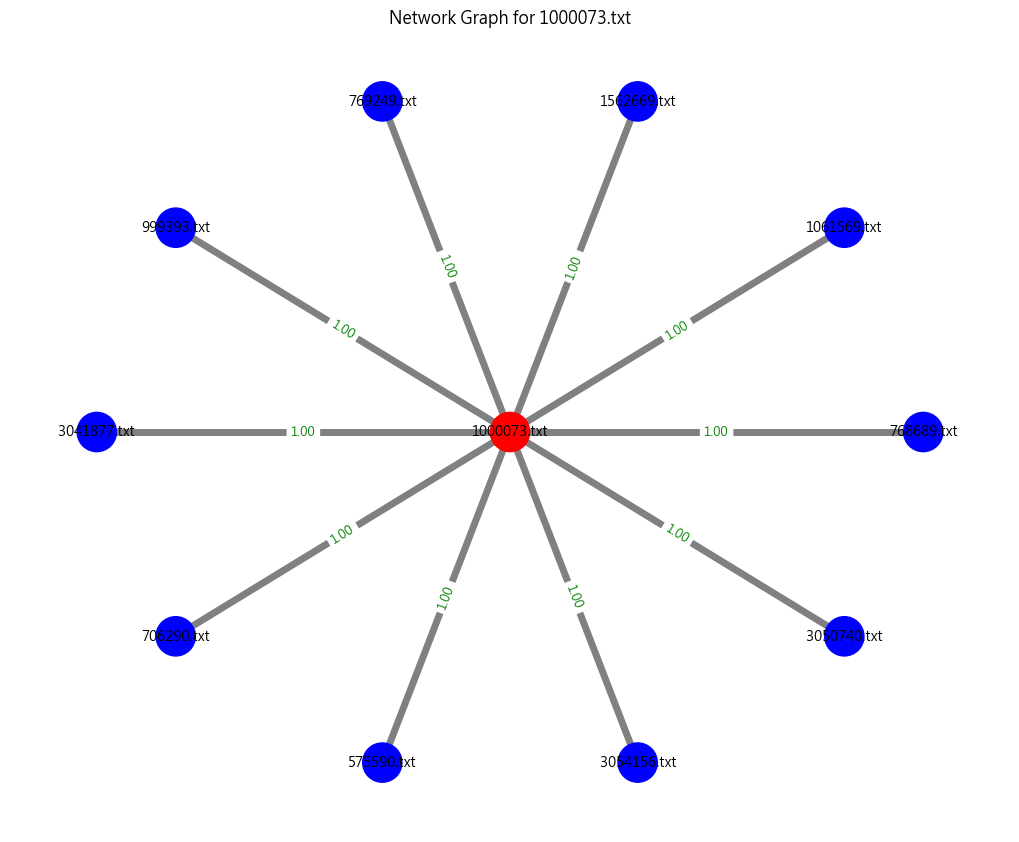

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


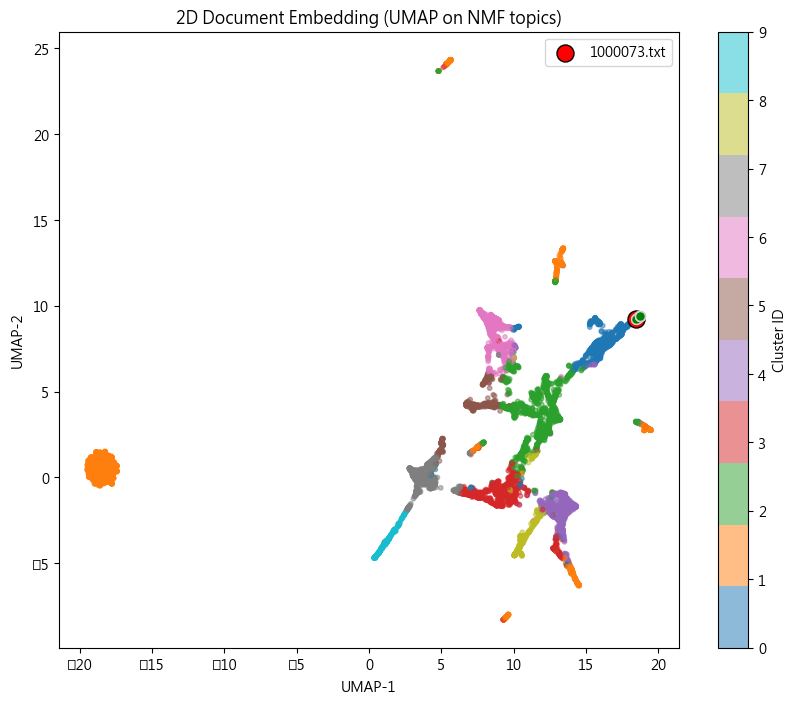

In [37]:
doc_name = input("請輸入要分析的檔名：").strip()

svd = TruncatedSVD(n_components=15, random_state=42)
doc_embeddings = svd.fit_transform(doc_topic_matrix)  # 使用 NMF 的文檔主題矩陣
print("Document embeddings shape:", doc_embeddings.shape)  # 應該是 (9943, 15)
doc_embeddings = normalize(doc_embeddings, norm='l2', axis=1)
doc_sim_matrix_truncated = cosine_similarity(doc_embeddings)

similar_docs = get_similar_docs_nmf(doc_name, doc_list, doc_sim_matrix_truncated)
keywords = extract_keywords_nmf(doc_name, doc_list, doc_topic_matrix, adjusted_vectorizer.get_feature_names_out())
clusters = cluster_docs(doc_embeddings, n_clusters=10)

if similar_docs is None:
    print("找不到此檔名")
else:
    print("\n最相關文件 Top 10：")
    for name, score in similar_docs:
        print(f"{name}: {score:.3f}")

    print("\n此文件的關鍵詞：")
    for w, s in keywords:
        print(f"{w}: {s:.3f}")

    print("\n預測此文件的 Cluster：", clusters[doc_list.index(doc_name)])

    # Visualization
    # plot_doc_similarity_nmf(doc_name, similar_docs)
    plot_network_graph_nmf(doc_name, similar_docs)
    plot_document_scatter_nmf(doc_embeddings, clusters, doc_list, targeted_doc=doc_name, similar_docs=[name for name, _ in similar_docs])

研究文本關聯機制是怎麼關聯

寫一個輸入文本編號，根據裡面關鍵字，比對其他文本關鍵字，相似度最高的其他文本，並寫出該文本關鍵字

將相似度矩陣最好的視覺化方式展現出來

然後利用幾個高頻詞作為範例、也可以用金融文本交集查看最關聯的關鍵字

查看前20高頻詞彙，最後面用來當example